In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
# five record feature_set with given outputs
# Let the feature_set denote : Smoke,Obese,Exercise
feature_set = np.array([[0,0,1],[0,1,1],[1,0,1],[1,1,1]])

# Let Labels denote a person is diabetic(1) or Non Diabetic(0)
labels = np.array([[0,0,1,1]]).T
print(f"Feature_Set:- \n {x} \n ********************\n Labels:- \n{y}")

Feature_Set:- 
 [[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]] 
 ********************
 Labels:- 
[[0]
 [0]
 [1]
 [1]]


In [119]:
# hyper parameters for our neural network
# random.seed function generates the same random values whenever the script is executed.
np.random.seed(42)

# Since we have three features in the input, we have a vector of three weights.
weights = np.random.rand(3,1)
bias = np.random.rand(1)
lr = 0.05

print(f"Weights:- \n {weights} \n\n Bias:- \n {bias}")

Weights:- 
 [[0.37454012]
 [0.95071431]
 [0.73199394]] 

 Bias:- 
 [0.59865848]


In [120]:
# randomly generate 100 linearly-spaced points between -10 and 10
input = np.linspace(-10, 10, 100)

# just showing you the random numbers 
print(input)

[-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919
  -8.98989899  -8.78787879  -8.58585859  -8.38383838  -8.18181818
  -7.97979798  -7.77777778  -7.57575758  -7.37373737  -7.17171717
  -6.96969697  -6.76767677  -6.56565657  -6.36363636  -6.16161616
  -5.95959596  -5.75757576  -5.55555556  -5.35353535  -5.15151515
  -4.94949495  -4.74747475  -4.54545455  -4.34343434  -4.14141414
  -3.93939394  -3.73737374  -3.53535354  -3.33333333  -3.13131313
  -2.92929293  -2.72727273  -2.52525253  -2.32323232  -2.12121212
  -1.91919192  -1.71717172  -1.51515152  -1.31313131  -1.11111111
  -0.90909091  -0.70707071  -0.50505051  -0.3030303   -0.1010101
   0.1010101    0.3030303    0.50505051   0.70707071   0.90909091
   1.11111111   1.31313131   1.51515152   1.71717172   1.91919192
   2.12121212   2.32323232   2.52525253   2.72727273   2.92929293
   3.13131313   3.33333333   3.53535354   3.73737374   3.93939394
   4.14141414   4.34343434   4.54545455   4.74747475   4.94949495
   5.151515

Lets see if you guys can figure out the differences between the two line plots!

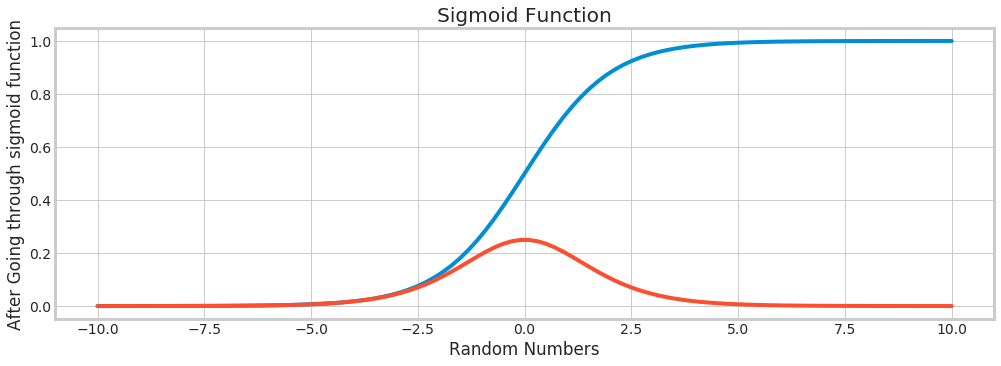

In [121]:
# Sigmoid function
def sigmoid(x):
  # Our activation function: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))

def sigmoid_der(x):
    return sigmoid(x)*(1-sigmoid(x))

plt.figure(figsize=(15,5))
sns.lineplot(x=input, y=sigmoid(input))
sns.lineplot(x=input, y=sigmoid_der(input))

plt.title("Sigmoid Function")
plt.xlabel("Random Numbers")
plt.ylabel("After Going through sigmoid function")
sns.set_style("whitegrid")

In [122]:
for epoch in range(2000):
    inputs = feature_set

    # feedforward step1
    XW = np.dot(feature_set, weights) + bias

    #feedforward step2
    z = sigmoid(XW)

    # backpropagation step 1
    error = (z - labels)

    print(error.sum())

    # backpropagation step 2
    dcost_dpred = error
    dpred_dz = sigmoid_der(z)

    z_delta = dcost_dpred * dpred_dz

    inputs = feature_set.T
    weights -= lr * np.dot(inputs, z_delta)

    for num in z_delta:
        bias -= lr * num

1.4788563900207288
1.4641928568269347
1.449312893289
1.43422362906131
1.4189326808245462
1.4034481391326783
1.3877785527407118
1.37193291045234
1.3559206205500254
1.3397514878934278
1.3234356887951355
1.3069837438050467
1.2904064885560818
1.2737150428439166
1.2569207781316916
1.2400352836869968
1.223070331572448
1.2060378407227403
1.1889498403499275
1.1718184329247108
1.1546557569846332
1.137473950020212
1.1202851116872483
1.103101267587833
1.085934333854127
1.0687960827579064
1.0516981095554114
1.034651800761438
1.0176683040291423
1.0007584997930152
0.9839329748122542
0.9672019977306086
0.9505754967471114
0.9340630394701955
0.9176738150059043
0.9014166183095237
0.885299836809262
0.8693314392908653
0.8535189670134785
0.837869527009834
0.8223897875081513
0.8070859753990361
0.7919638756583056
0.7770288326260373
0.762285753033292
0.7477391106608673
0.7333929525090419
0.7192509063535326
0.7053161895606878
0.6915916190342007
0.6780796221662236
0.6647822486675484
0.6517011831544038
0.6388377

In [123]:
# You can see that the weights n biases have been automatically corrected for the least MSE
print(f"Weights:- \n {weights} \n\n Bias:- \n {bias}")

Weights:- 
 [[ 5.83538621]
 [-0.17916495]
 [-1.34644957]] 

 Bias:- 
 [-1.47978503]




---
# Predictions


In [124]:
# Let's predict an unknown value now
new_input = np.array([1,0,0])
result = sigmoid(np.dot(new_input, weights) + bias)
print(result)

[0.98732792]


The above person -> 

*   Smokes (**1**)
*   is not Obese (**0**)
*   Doesn't Exercise (**0**)

Thus our NN classifies him as **Diabetic (~1)**


In [125]:
# Let's predict another value
new_ip = np.array([0,1,0])
result = sigmoid(np.dot(new_ip, weights) + bias)
print(result)

[0.159903]


The above person -> 

*   doesn't Smoke (**0**)
*   is Obese (**1**)
*   Doesn't Exercise (**0**)

Thus our NN classifies him as **Non-Diabetic (~0)**